##### John Franklin Crenshaw

.

Physics 566 Problem Set 7

April 5, 2019

In [51]:
import numpy as np
from numpy import exp,sin,cos,pi
from scipy.fftpack import dst, idst
import matplotlib.pyplot as plt

In [2]:
# Plot aesthetics
plt.style.use('jfc') # a style sheet I have defined on my computer
%config InlineBackend.figure_format = 'retina'

***
#### (1) CP 9.2
###### *Solving Poisson's equation with over-relaxation and the Gauss-Seidel method*

The electric potential in a region with no charge is given by the solution to the Laplace equation
$$ \nabla^2 V = 0, $$
subject to boundary conditions. This equation can be solved numerically by dividing the region into bins, and setting the potential in each bin equal to the average of its non-diagonal neighbors. If you iterate the process, potential values eventually converge. This process can be sped up if you use the Gauss-Seidel (GS) method. In the GS method, as you move across the bins, taking the averages, you use the new updated values for the trailing bins in the averaging. You can combine this with over-relaxation, in which you overshoot the average by a little bit. This can improve the speed by an order of magnitude.

Below, I solve Laplace's equation for a box, where 3 sides are grounded and the top edge is at 1V.

In [20]:
# constants
M = 100 # bins per side
V = 1.0
w = 0.9
tol = 1e-6 # error tolerance

# potential values
phi = np.zeros([M+1,M+1],float)
phi[:,-1] = V

# Main loop
delta = 1.0
while delta > tol:
    
    # save a copy for error estimation
    copy = np.copy(phi)
    
    # calculate new values of the potential
    for i in range(1,M):
        for j in range(1,M):
            phi[i,j] = (1+w)/4*(phi[i+1,j] + phi[i-1,j] + \
                                phi[i,j+1] + phi[i,j-1]) - \
                                w*phi[i,j]
    
    # max difference
    delta = np.max(np.abs(phi-copy))

    

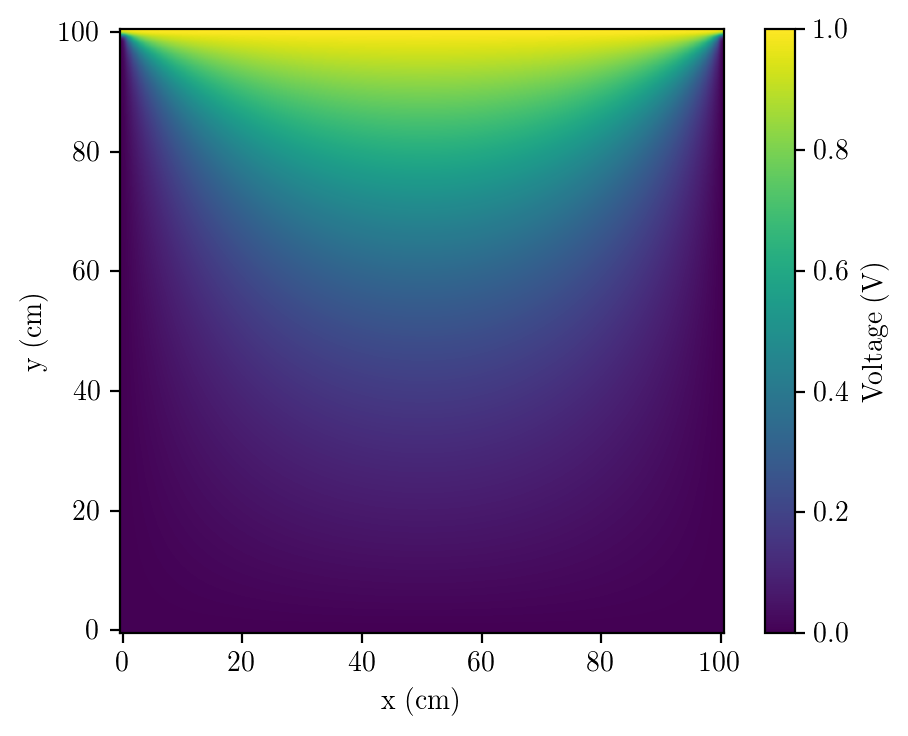

In [22]:
# plot the results
plt.imshow(phi.T,origin="lower",interpolation="gaussian")
plt.xlabel("x (cm)")
plt.ylabel("y (cm)")
cb = plt.colorbar()
cb.set_label("Voltage (V)")
plt.show()

***
#### (2) CP 9.3
###### *Solving Poisson's equation with over-relaxation and the Gauss-Seidel method*

The structure of this problem (and its solution) is identical to the previous problem. This time, the edges of the box are all grounded, and there are two plate capacitors in the box, held at $\pm 1 V$.

In [23]:
# constants
M = 100 # bins per side
V = 1.0
w = 0.9
tol = 1e-2 # error tolerance

# potential values
phi = np.zeros([M+1,M+1],float)
phi[20,20:-20] = 1
phi[80,20:-20] = -1

# Main loop
delta = 1.0
while delta > tol:
    
    # save a copy for error estimation
    copy = np.copy(phi)
    
    # calculate new values of the potential
    for i in range(1,M):
        for j in range(1,M):
            if (i != 20 and i != M-20) or (j < 20 or j > M-20):
                phi[i,j] = (1+w)/4*(phi[i+1,j] + phi[i-1,j] + \
                                    phi[i,j+1] + phi[i,j-1]) - \
                                    w*phi[i,j]
            
    
    # max difference
    delta = np.max(np.abs(phi-copy))


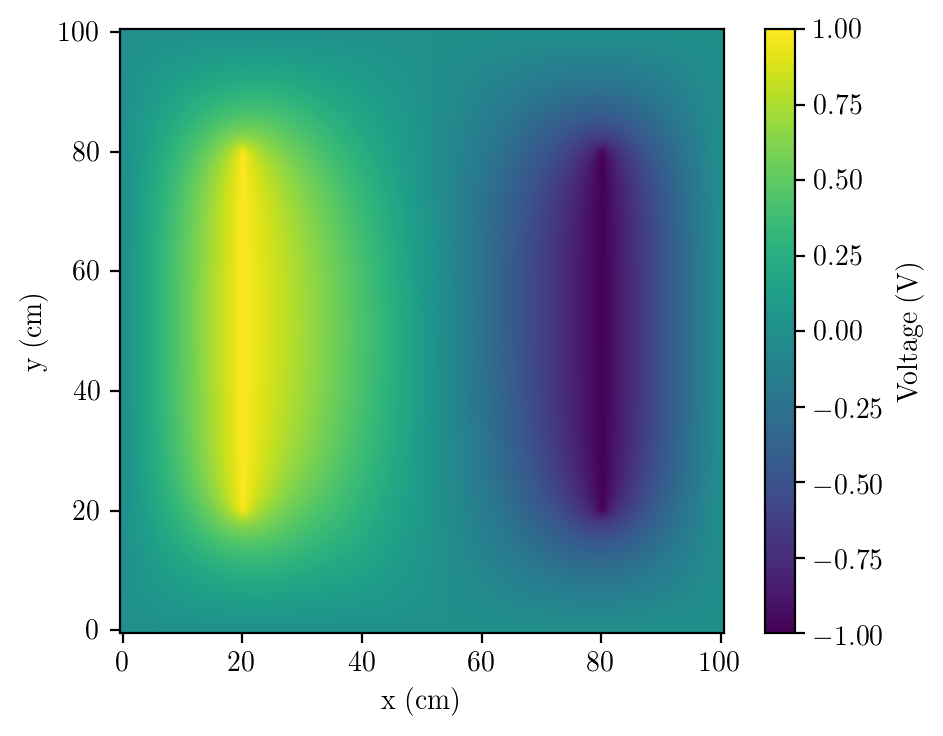

In [24]:
# plot the results   
plt.imshow(phi.T,origin="lower",interpolation="gaussian")
plt.xlabel("x (cm)")
plt.ylabel("y (cm)")
cb = plt.colorbar()
cb.set_label("Voltage (V)")
plt.show()

***
#### (3) CP 9.4
###### *Flow of heat in the Earth's crust*

The diffusion of heat is determined by the heat equation
$$ \frac{\partial T}{\partial t} = D \frac{\partial^2 T}{\partial x^2}, $$
where D is the thermal diffusivity. You can solve this equation by splitting the domain x into N points. You can then estimate the second derivative using secants:
$$ \frac{\partial^2 \phi}{\partial x^2} = \frac{1}{a^2}[\phi(x+a,t) + \phi(x-a,t) - 2 \phi(x,t)], $$
where a is the point separation. We can then treat the value of $\phi$ at each point as an independent variable, and solve the the system as a system of simultaneous ODE's, which can be done with Euler's method.

Below I solve the heat equation for the Earth's crust. I model the surface temperature as a function of days t:
$$ T_0(t) = 10 ^{\circ}C + 12^{\circ}C \sin{\frac{2\pi t}{365 \text{ days}}}.$$
I model the temperature to a depth of 20 m, where the temperature is a constant $11^{\circ}C$. The thermal diffusivity is $D = 0.1 \text{m}^2 \text{day}^{-1}$. I solve for 9 years to allow my arbitrary initial conditions to relax into normal values, then I plot the temperature every three months for a year.

In [27]:
# constants
L = 20 # max depth, m
D = 0.1 # thermal diffusivity, m^2/day
N = 100 # number of bins
a = L/N # bin spacing, m
h = 1e-1 # time step, days
epsilon = h/2

# temperature fluctation
T0 = lambda t: 10 + 12*np.sin(2*np.pi*t/365)

# arrays
T = np.zeros(N+1,float)
T[0]   = T0(0) # C
T[1:N] = 10 # C
T[N]   = 11 # C

# times to plot
tlist = np.array([9,9.25,9.5,9.75,10])*365
tend = tlist[-1] + epsilon
Tsave = np.copy(T)

# Main loop
t = 0.0
c = h*D/a**2
while t < tend:
    
    # calculate new T values
    T[0] = T0(t)
    for i in range(1,N):
        T[i] = T[i] + c*(T[i+1] + T[i-1] - 2*T[i])
    
    t += h
    
    for ti in tlist:
        if abs(t-ti) < epsilon:
            Tsave = np.vstack((Tsave,T))

plt.show()

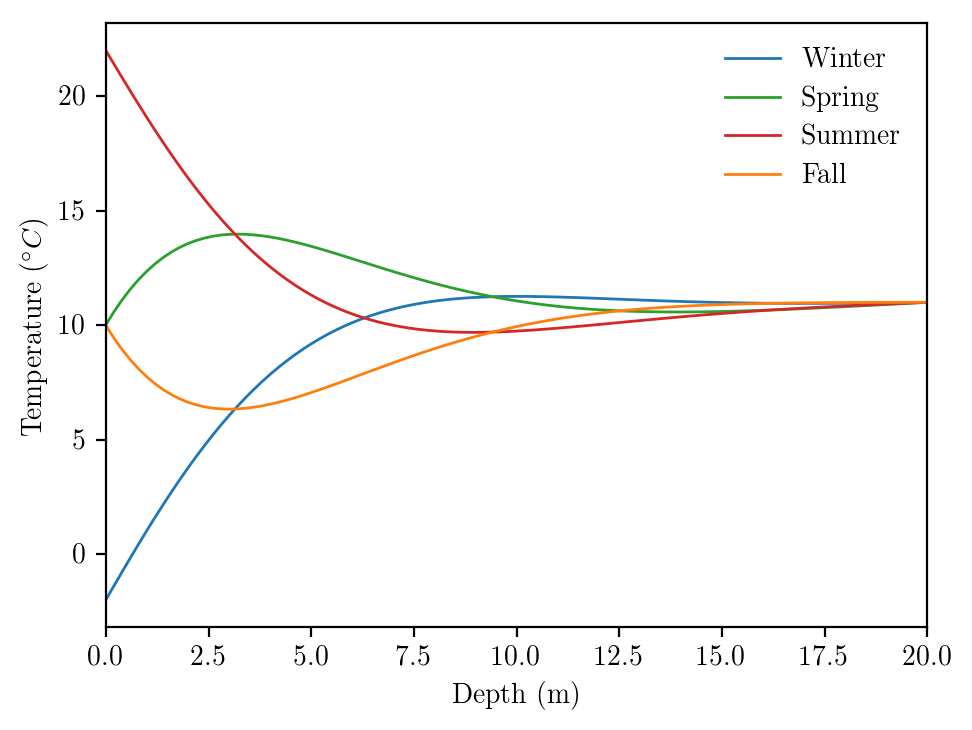

In [28]:
x = np.linspace(0,L,len(T))

plt.plot(x,Tsave[4],c="C0",label="Winter")
plt.plot(x,Tsave[3],c="C2",label="Spring")
plt.plot(x,Tsave[2],c="C3",label="Summer")
plt.plot(x,Tsave[1],c="C1",label="Fall")

plt.legend()

plt.xlim(0,20)
plt.xlabel("Depth (m)")
plt.ylabel("Temperature ($^{\circ}C$)")

plt.show()

***
#### (4) CP 9.5
###### *The wave equation*

The same methods of the previous section can be used to solve the wave equation
$$ \frac{\partial^2 \phi}{\partial x^2} - \frac{1}{v^2}\frac{\partial^2 \phi}{\partial t^2} = 0, $$
however, the solution is unstable. The solution is only accurate for a short amount of time, and the numerical instabilites grow rapidly to overwhelm the behavior. This is seen blow, where I solve the wave equation for waves on a string. 

In [8]:
# constants
v = 100 # wave speed, m/s
L = 1 # string length, m
d = 0.1 # m 
C = 1 # m/s
sig = 0.3 # m
N = 100 # number of bins
a = L/N # bin spacing
h = 1e-6 # s
epsilon = h/1000

# initial conditions
phi0 = lambda x: C*x*(L-x)/L**2*np.exp(-(x-d)**2/(2*sig**2))

# arrays
phi = np.zeros(N+1,float)
psi = phi0(np.linspace(0,L,N+1))

# times to plot
tlist = [2e-3,50e-3,100e-3]
tend = tlist[-1] + epsilon
save = np.copy(phi)

# Main loop
t = 0.0
while t < tend:
    
    phi2 = np.copy(phi)
    psi2 = np.copy(psi)
        
    # calculate new values
    for i in range(1,N):
        
        psi[i] = psi2[i] + h*v**2/a**2*(phi2[i+1] + phi2[i-1] - 2*phi2[i])
        phi[i] = phi2[i] + h*psi2[i]
    
    t += h
    
    for ti in tlist:
        if abs(t-ti) < epsilon:
            save = np.vstack((save,phi))

plt.show()

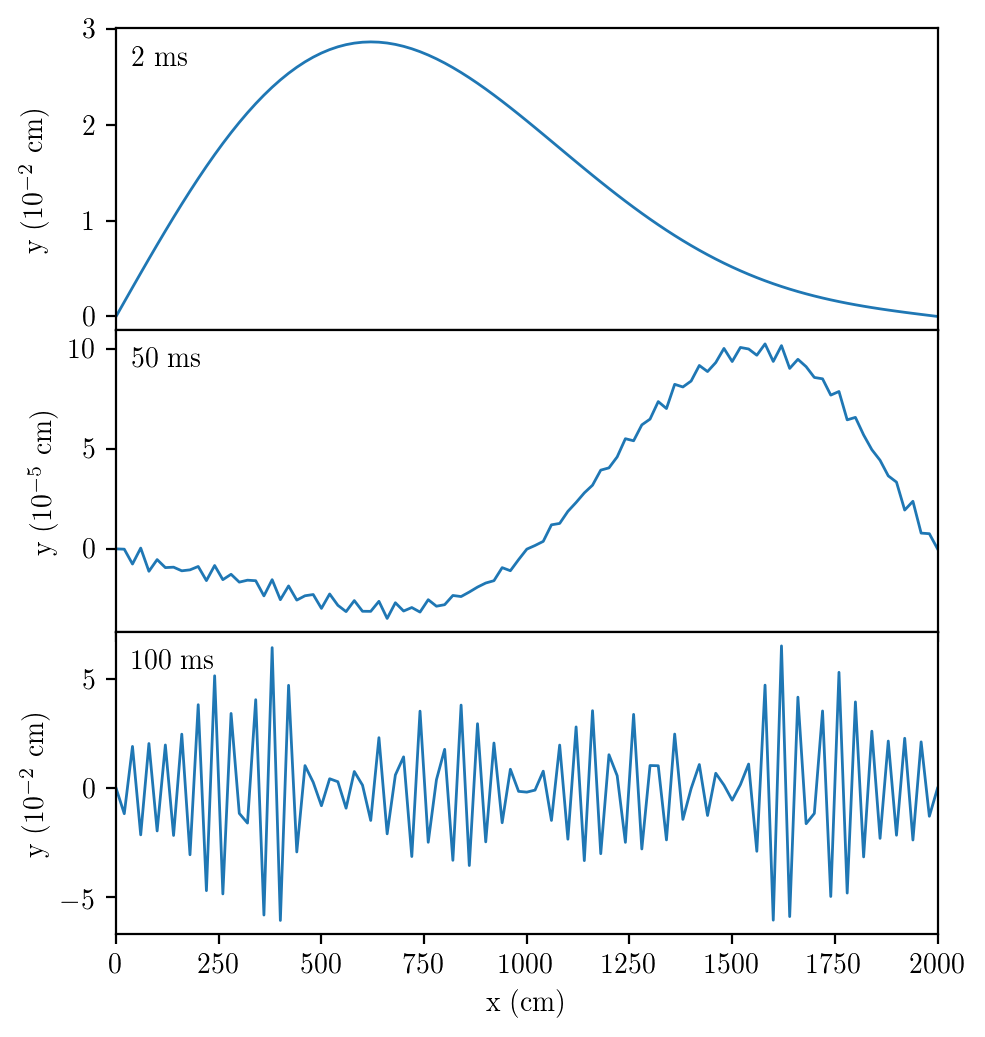

In [46]:
# plot the results
fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(5.3,6),sharex=True)

xmax = 100*L # cm
x = np.linspace(0,xmax,N+1)
ax1.plot(x,save[1]*1e4)
ax2.plot(x,save[2]*1e7)
ax3.plot(x,save[3]*1e4)

ax1.set_xlim(0,xmax)
ax2.set_xlim(0,xmax)
ax3.set_xlim(0,xmax)

ax3.set_xlabel("x (cm)")
ax1.set_ylabel("y ($10^{-2}$ cm)",labelpad=12)
ax2.set_ylabel("y ($10^{-5}$ cm)")
ax3.set_ylabel("y ($10^{-2}$ cm)")

ax1.text(0.02,0.9,"2 ms",transform=ax1.transAxes,ha='left',va='center')
ax2.text(0.02,0.9,"50 ms",transform=ax2.transAxes,ha='left',va='center')
ax3.text(0.02,0.9,"100 ms",transform=ax3.transAxes,ha='left',va='center')

fig.subplots_adjust(hspace=0)

plt.show()

You can see that as time progresses 3 ms $\rightarrow$ 50 ms $\rightarrow$ 100 ms, the numerical instabilities grow.

***
#### (5) CP 9.9
###### *Solving the Schroedinger Equation with the spectral method*

For the wave equation in a box, the general solution to the Schroedinger equation is 
$$ \psi(x_n,t) = \frac{1}{N} \sum_{k=1}^{N-1} b_k \sin{(\pi k n / N)} \exp{(i \frac{\pi^2 \hbar k^2}{2ML^2}t)}, $$
where $x_n$ is the position of point n, $N$ is the total number of points, and $L$ is the width of the box.

Notice, that this sum is just a Fourier series! If you know the initial conditions $\psi(x,0)$, you can take the inverse Fourier transform to find the coefficients $b_k$, and then you immediately have the solution for all future times t. I do this below for the initial condition
$$ \psi(x,0) = \exp{\left[-\frac{(x-x_0)^2}{2 \sigma^2}\right]} e^{ikx}. $$

In [48]:
# constants
L = 1e-8 # m
M = 9.109e-31 # electron mass, kg
x0 = L/2 # m
sig = 1e-10 # m
k = 5e10 # 1/m
hbar = 1.05457e-34 # m^2*kg/s

# initial conditions
f = lambda x: np.exp(-(x-x0)**2/(2*sig**2) + 1j*k*x)
N = 10000 # number of points
x = np.linspace(0,L,N)
psi0 = f(x)

# fourier transform
alpha = dst(np.real(psi0)) # real part
eta = dst(np.imag(psi0)) # imaginary part

# calculate Re(psi(t)) via inverse fourier transform
coeff = lambda t: [alpha[k]*cos(pi**2*hbar*k**2/(2*M*L**2)*t) - 
                   eta[k]*sin(pi**2*hbar*k**2/(2*M*L**2)*t) 
                   for k in range(len(alpha))]

psi0 = idst( coeff(0) )
psi1 = idst( coeff(5e-16) )
psi2 = idst( coeff(10e-16) )
psi3 = idst( coeff(15e-16) )
psi4 = idst( coeff(20e-16) )

First I plot the real part of the wave-function:

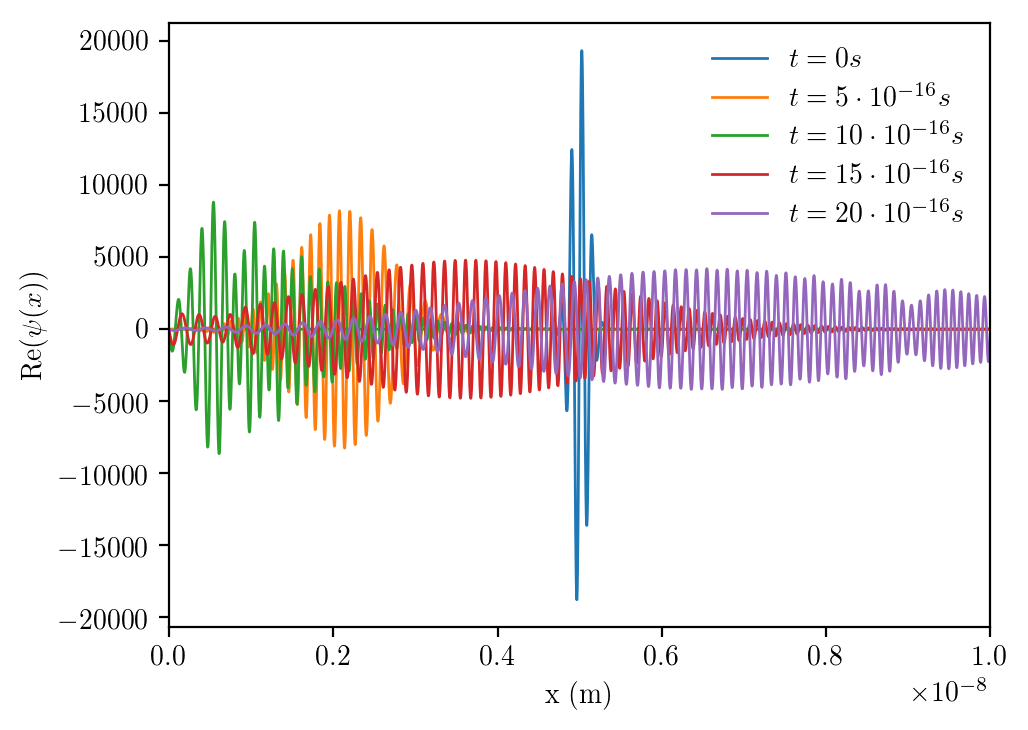

In [54]:
plt.plot(x,psi0,label="$t=0s$")
plt.plot(x,psi1,label="$t=5 \cdot 10^{-16}s$")
plt.plot(x,psi2,label="$t=10 \cdot 10^{-16}s$")
plt.plot(x,psi3,label="$t=15 \cdot 10^{-16}s$")
plt.plot(x,psi4,label="$t=20 \cdot 10^{-16}s$")
plt.legend()
plt.xlim(0,1e-8)
plt.xlabel("x (m)")
plt.ylabel("Re($\psi(x)$)")
plt.show()

To make the behavior more transparent, I plot the absolute value of the real part:

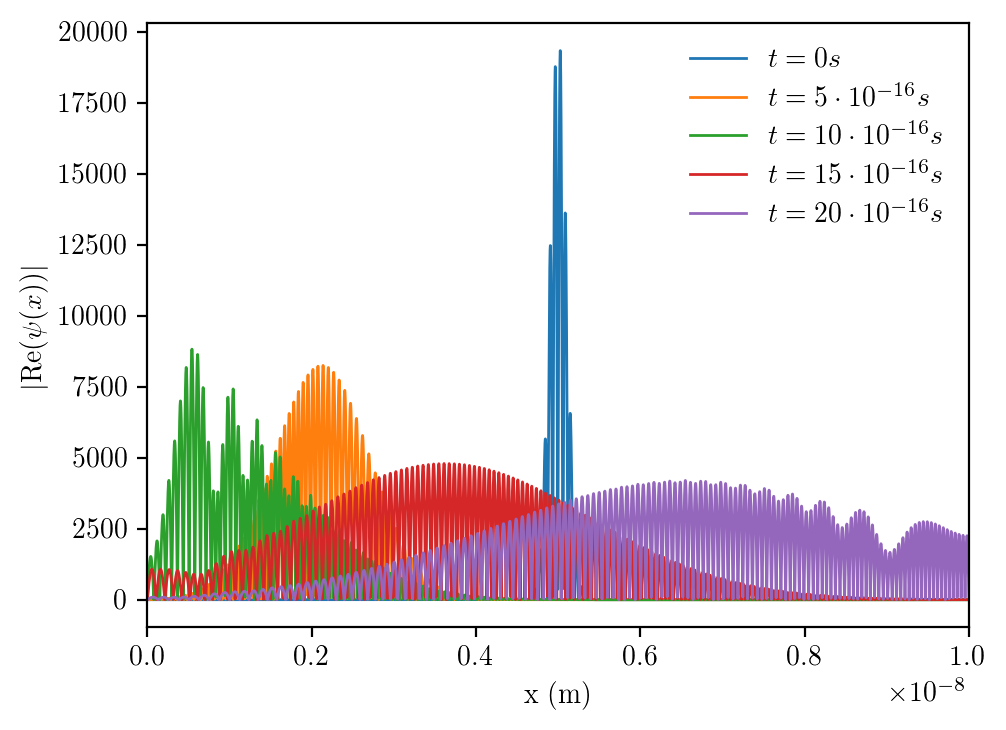

In [56]:
plt.plot(x,abs(psi0),label="$t=0s$")
plt.plot(x,abs(psi1),label="$t=5 \cdot 10^{-16}s$")
plt.plot(x,abs(psi2),label="$t=10 \cdot 10^{-16}s$")
plt.plot(x,abs(psi3),label="$t=15 \cdot 10^{-16}s$")
plt.plot(x,abs(psi4),label="$t=20 \cdot 10^{-16}s$")
plt.legend()
plt.xlim(0,1e-8)
plt.xlabel("x (m)")
plt.ylabel("$|$Re($\psi(x)$)$|$")
plt.show()

It is easy to see that the wave function starts concentrated in the center. It then moves left and then reflects off the wall. As it travels, the wave packet also spreads. This can really be seen in the red and purple plots. The purple plot is interesting on the right, as you can see some destructive interference as the front edge of the wave function begins to reflect off the wall.